# [Day 14](https://adventofcode.com/2023/day/14)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from typing import Callable, Tuple


In [2]:
fNames = ["input", "test"]
with open(fNames[0]) as a:
    input = [list(l.strip("\n")) for l in a.readlines()]

surface_org = np.array(input)
len(input), surface_org

(100,
 array([['O', '#', 'O', ..., '#', '.', '.'],
        ['#', '.', '#', ..., '.', 'O', '.'],
        ['#', '#', '#', ..., '.', '.', '#'],
        ...,
        ['O', '.', '.', ..., '.', '#', '.'],
        ['.', '.', '.', ..., 'O', '.', '.'],
        ['.', '.', 'O', ..., 'O', '#', '.']], dtype='<U1'))

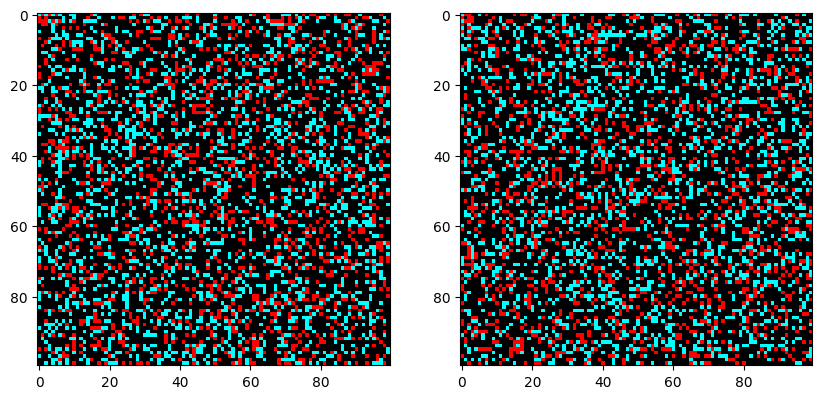

In [3]:
def get_image(ndarr: np.ndarray):
  arr = np.zeros((*ndarr.shape, 3))
  arr[ndarr == 'O'] = [0,1,1]
  arr[ndarr == '#'] = [1,0,0]
  return arr

def print_images(arr1: np.ndarray, arr2: np.ndarray):
  fig, (ax1, ax2) = plt.subplots(1, 2)

  ax1.imshow(get_image(arr1))

  ax2.imshow(get_image(arr2))
  
  fig.set_size_inches(10,20)


# plt.imshow(get_image(surface_org))
print_images(surface_org, surface_org.T)

In [4]:
def move_dir(
    ndarr: np.ndarray,
    coordinates: Tuple[int, int],
    direction: Tuple[int, int],
    condition: Callable[[chr], bool],
) -> Tuple[int, int]:
    curr_pos = np.array(coordinates)
    next_pos = curr_pos + np.array(direction)

    while True:
        next_pos = curr_pos + np.array(direction)
        # print(curr_pos, next_pos, ndarr[*next_pos],condition(ndarr[*next_pos]))

        if condition(ndarr[*next_pos]):
            return tuple(curr_pos)

        if not all(0 <= next_pos) or not all(next_pos < np.array(ndarr.shape)):
            return tuple(curr_pos)

        curr_pos = next_pos


In [5]:
org = (6, 2)
direction = (-1, 0)
print(org, surface_org[org])
res = move_dir(surface_org, org, direction, lambda x: x != ".")
print("res", res, surface_org[res])
res

(6, 2) .
res (4, 2) .


(4, 2)

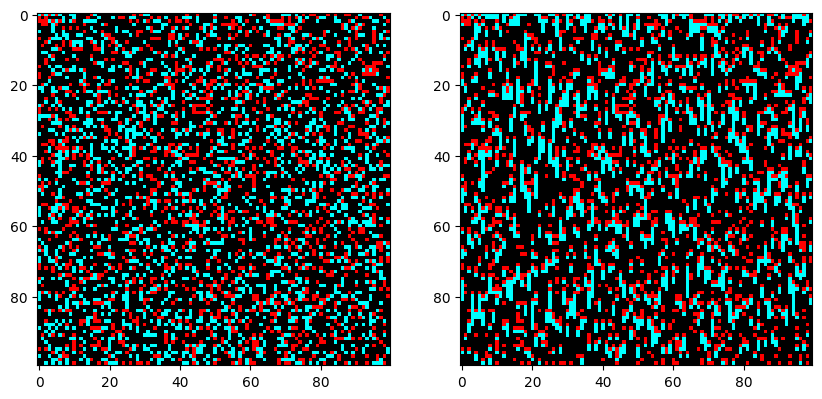

In [6]:
# Test tilt up
def tilt(org: np.ndarray):
  arr = org.copy()
  direction = (-1, 0)
  rounded_rocks = np.argwhere(arr == 'O')
  for rock in rounded_rocks:
    arr[*rock] = '.'
    to = move_dir(arr, rock, direction, lambda x: x != ".")
    arr[to] = 'O'


  return arr

res = tilt(surface_org)
print_images(surface_org, res)

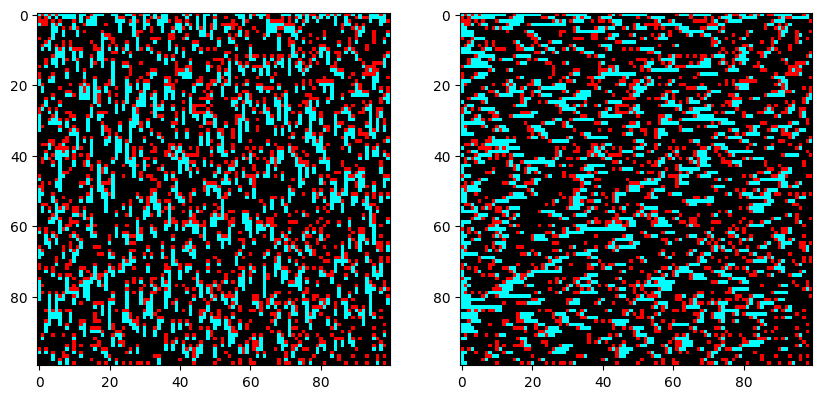

In [7]:
res1 = tilt(res.T).T
print_images(res, res1)

In [8]:
m = np.array(list(reversed(range(res.shape[0])))) + 1
r = np.sum(res == 'O',axis=1) * m
sum(r)

105003

## Part 2

In [9]:
surface_n = surface_org.copy()
surface_w = np.rot90(surface_n, axes=(1,0))
surface_s = np.rot90(surface_w, axes=(1,0))
surface_e = np.rot90(surface_s, axes=(1,0))

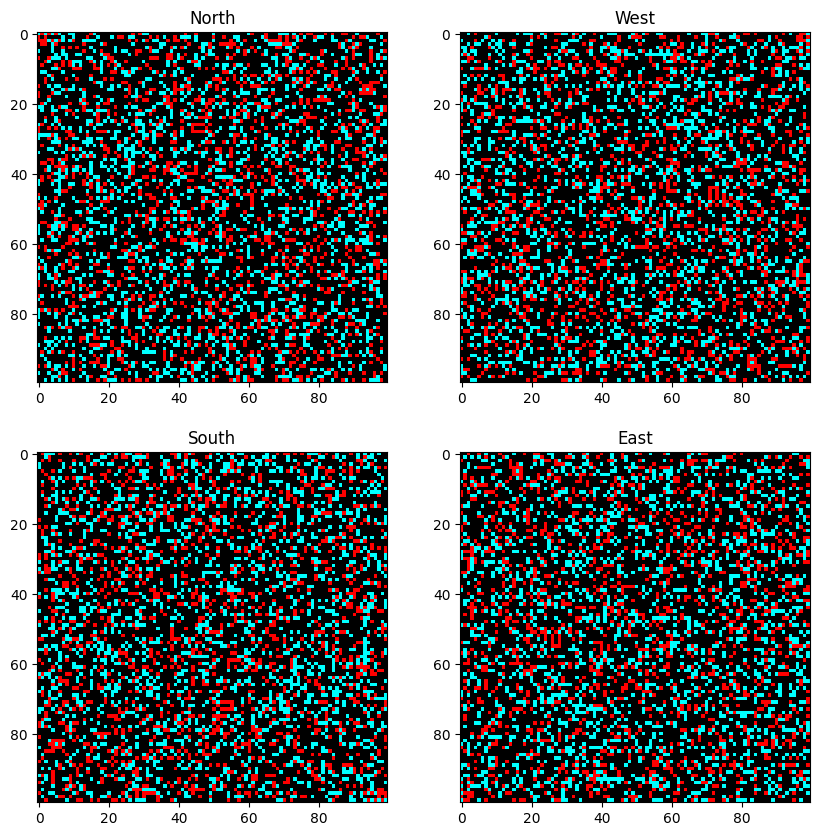

In [10]:
fig, ((ax_north, ax_west), (ax_south, ax_east)) = plt.subplots(2, 2)
ax_north.set_title("North")
ax_north.imshow(get_image(surface_n))
ax_west.set_title("West")
ax_west.imshow(get_image(surface_w))
ax_south.set_title("South")
ax_south.imshow(get_image(surface_s))
ax_east.set_title("East")
ax_east.imshow(get_image(surface_e))
fig.set_size_inches(10, 10)

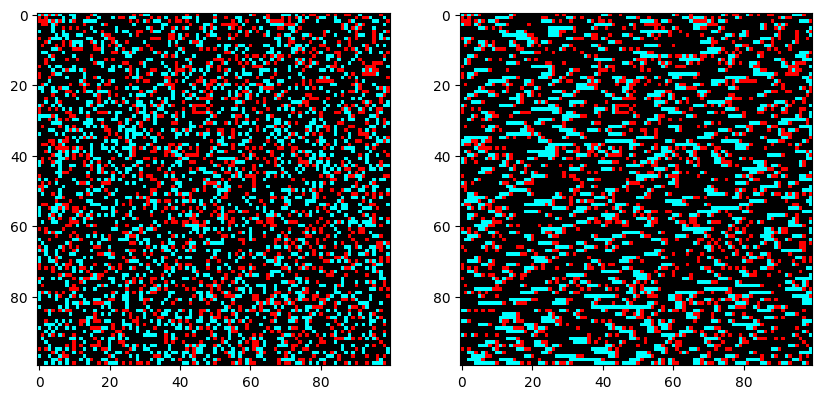

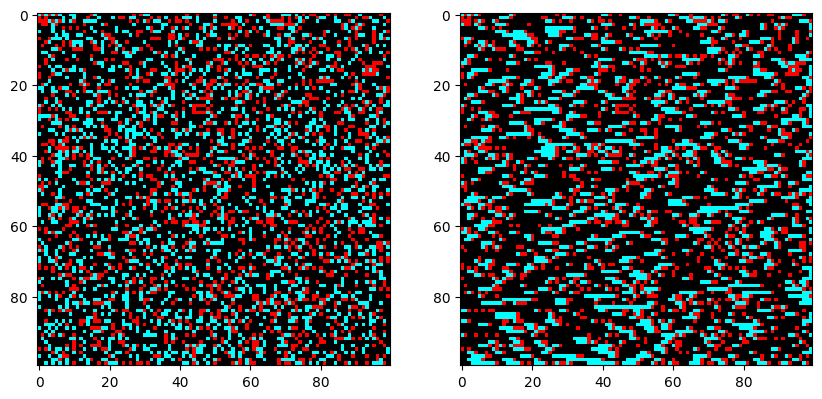

In [11]:
def tilt_cycle(ndArr: np.ndarray):
  arr = tilt(ndArr)
  for _ in range(3):
    arr = tilt(np.rot90(arr, axes=(1,0)))
  return np.rot90(arr, axes=(1,0))

c1 = tilt_cycle(surface_org)
print_images(surface_org, c1)
c2 = tilt_cycle(c1)
print_images(surface_org, c2)


In [12]:
def get_score(arr: np.ndarray):
  m = np.array(list(reversed(range(arr.shape[0])))) + 1
  r = np.sum(arr == 'O',axis=1) * m
  return sum(r)

def ndarray_to_tuple(arr: np.ndarray):
  return tuple(tuple(row) for row in arr)


In [13]:
before = surface_org.copy()
target = 10**9
memo = {}
c = 0
while c < target:
    c += 1
    after = tilt_cycle(before)
    before = after
    key = ndarray_to_tuple(before)
    if (key in memo):
        cycle_len = c - memo[key]
        skips = (target - c) // cycle_len
        c += skips * cycle_len
    memo[key] = c


In [15]:
get_score(before)

93742